In [1]:
#import data 
import pandas as pp
path='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df=pp.read_csv(path)
df
# import linear_model  from scikit-learn
from sklearn.linear_model import LinearRegression
lm=LinearRegression() # creat linear regression object(e.g lm) using constructor
x = df[['highway-mpg']] #define predicator variable
y = df[['price']]
lm.fit(x,y)

# Model evalution
# 1. we can evaluate the model by campare the training data and pridicatio
# 2 by seen the virluatization
# 3 cross validiation

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [ ]:
# 1. we can evaluate the model by campare the training data and pridicatio

# Model evalution and refinement
# the better way for model evalution campare the training data to pridicative data if it make sense then it mean our predication is true
# how we can make the training data?
# we have function train_test_split function in sklearn librrary so we use this for make training and testing data
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)   #0.3 show test the 30 percent of the test data and 70 percent for training
xtrain
xtest      # campare these two x_traing data and xtest(prication) if similarity is  occoure then predication is ok
ytrain   # campare these two y_traing data and ytest(prication) if similarity is  occoure then predication is ok
ytest 

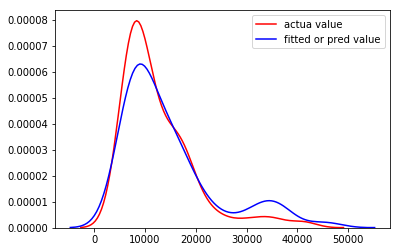

In [4]:
# 2 by seen the virluatization

#Generalization performance tell us our data perform well for make predication
import seaborn as sns
actual = sns.distplot(ytrain, hist=False, color="r" , label="actua value" )  # hist= false we not want to see the his if we want to see then put true
pred=lm.predict(x)
pred=  sns.distplot(ytest,  hist=False,  color="b",  label="fitted or pred value" , ax=actual)

# this figure tell us triningdata(ytrain(prcie)) give us very good pricdication(ytest(price)) 

In [16]:
#cross validiation
# evaluate the model by cross validation when we have alot of data then we use it. For this make group of the data
# for this we use function cross_val_score()
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
score=cross_val_score(lm,xtest,ytest,cv=3) #cv=3 it mean data is divide into 3 equal partition
score

# cross_val_score()  give us the predication for each element when it was in test set

array([0.12702375, 0.50065269, 0.54825819])

In [17]:
# we know Numpy is use for handling arry
import numpy as np
np.mean(score)

0.3919782103844149

In [18]:


# over fitting and under fitting model selection
# i remind during predication when data is sepread more around the x_axis then we say its over fitted(during polynoial and linear regression)
# it is use for pick the best polynomial order and problems that arise when we pick the wrong polynomial

# when training data virtualization = test data virtualization is called underfitting
# when training data virtualization != test data virtualization is called overfitting

In [19]:
#Ridge Regression(it is algorithm that is use whe analyse the multiple regression data that suffer from multicollinearity(over fiiting) . when least square estimate(evaluation measeure are unbiases)  )
# in smiple language sb sy ply hum linear reggression use krty hai jb prication curvature(v shape) ki shakal me ati ha phr hum us ko handle krny k lyia polynoimail regrssion use krtyb hai jb wo over fitting ho jy to then hum us ko handle krny k lyia ridge regression use krty ha]


# in this regression we prevent over fitting that heppen in polynoimal regression. over fitting is too much big problem when you have multiple independ variable e,g   y=x^3 + 2x^2 + x

# for handle this we use the alpha function(0, 0.001 ,0.01, 1, 10) if alpha is going large cofficient of the indeoend is going small this better for prevent over fitting

# for make prediction we use ridge
from sklearn.linear_model import Ridge
rm=Ridge(0.1)
rm.fit(x,y)     #same sara linear model ki tra hi ha


Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
rm.predict(x)